In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
# dataset being used - 2015 Loan Data for Company "Lending Club"
# This csv file is 326 MB!!!! Guaranteed to crash :)

dfrf = pd.read_csv(
    r'C:/Users/jafon/Documents/PythonMaterials/Data/LoanStats3d/LoanStats3d1.csv',
    skipinitialspace=True,
    header=1,
)
dfrf.head()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [3]:
type(dfrf.int_rate[5])

str

In [4]:
# First step is to convert the "grades" in the dataset to numerical values for
# sklearn to make sense of it (sklearn can't work with strings)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [5]:
X = dfrf.drop('loan_status', 1)
Y = dfrf['loan_status']
rfc = ensemble.RandomForestClassifier()

In [6]:
# a lot of unique values to convert - drop the columns with too many unique values

dfrf.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# Work with the columns you **do** want.
dfrf['id'] = pd.to_numeric(dfrf['id'], errors='coerce')
dfrf['int_rate'] = pd.to_numeric(dfrf['int_rate'].str.strip('%'), errors='coerce')



In [7]:
# remove the final two rows

# ONLY RUN THIS ONE TIME!

dfrf = dfrf[:-2]

In [8]:
dfrf.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421090,36371250.0,39102635.0,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,8 years,...,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0
421091,36441262.0,39152692.0,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,10+ years,...,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0


In [9]:
# Able to convert to dummies now after dropping a large number of columns
pd.get_dummies(dfrf)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [10]:

X = dfrf.drop('loan_status', 1) 
### features are everything BUT loan_status, which is dropped axis=1

Y = dfrf['loan_status'] # using loan status solely as target variable, y
X = pd.get_dummies(X)

# Note1: we are dropping NaN columns because dataset is so large, 
# so we don't need them
X = X.dropna(axis=1)

In [11]:
# now with cleaned data - can run cross val score with random forest


from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [13]:
# ensemble.RandomForestClassifier(n_estimators = 10) is default setting
rfc = ensemble.RandomForestClassifier()

In [15]:
# Very large file - takes a few minutes to run - BE WARY!

cross_val_score(rfc, X, Y, cv=10)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

array([0.97988649, 0.98067013, 0.98171499, 0.98164375, 0.97228687,
       0.97829494, 0.9667292 , 0.98043174, 0.97952834, 0.98064409])

# Assignment Goal:

Try to get rid of much data as possible (to make the model more efficient due to the length of having to run this) _without_ dropping below an average of 90% accuracy in a 10-fold cv.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [16]:
X.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
dfrf['loan_status'][:5] # don't mind me - just reminding myself of what I'm looking for

0       Current
1       Current
2    Fully Paid
3       Current
4    Fully Paid
Name: loan_status, dtype: object

In [36]:
#setting this up again with new parameters for the assignment model
rfc2 = ensemble.RandomForestClassifier(n_estimators=5, max_depth=5)

In [21]:
print(list(X.columns)) # I don't even know what's in my dataset. Better late than never to find out

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_cre

In [23]:
X2 = X[['member_id', 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 
        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'recoveries', 'collection_recovery_fee', 
        'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
        'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt']].copy()

In [24]:
X2['term'] = dfrf['term']

In [29]:
print(X.head(1)) # just want to see how many columns there are
print(X2.head(1))

           id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  68009401.0  72868139.0    16000.0      16000.0          16000.0     14.85   

   installment  annual_inc    dti  delinq_2yrs  \
0       379.39     48000.0  33.18          0.0   

                  ...                  last_credit_pull_d_Nov-2016  \
0                 ...                                            0   

   last_credit_pull_d_Oct-2015  last_credit_pull_d_Oct-2016  \
0                            0                            0   

   last_credit_pull_d_Sep-2015  last_credit_pull_d_Sep-2016  \
0                            0                            0   

   application_type_INDIVIDUAL  application_type_JOINT  \
0                            1                       0   

   verification_status_joint_Not Verified  \
0                                       0   

   verification_status_joint_Source Verified  \
0                                          0   

   verification_status_joint_Verified 

In [31]:
X2['term'][:10] # that's what I get for trying to squeeze in a non-X feature into X2

0     60 months
1     36 months
2     36 months
3     36 months
4     36 months
5     60 months
6     60 months
7     60 months
8     60 months
9     60 months
Name: term, dtype: object

In [33]:
X2['term'] = X2['term'].str.replace(' months', '')
X2['term'] = [float(i) for i in X2['term']]

In [34]:
# now with a sufficient cut-down, let's see if this works
cross_val_score(rfc2, X2, Y, cv=10)

array([0.88304718, 0.89332953, 0.88188359, 0.89817387, 0.89254334,
       0.90192353, 0.81545513, 0.89546178, 0.90011162, 0.90668788])

In [37]:
# that was significantly faster AND X2 doesn't include outstanding principal or payment amount!
# modifying the parameters one more time should yield >90% accuracy
rfc3 = ensemble.RandomForestClassifier(n_estimators=25, max_depth=5) # I'll play around with it later

In [38]:
cross_val_score(rfc3, X2, Y, cv=10)

array([0.86328988, 0.89278336, 0.89150103, 0.89805514, 0.90080741,
       0.90111612, 0.90287112, 0.90351231, 0.90381647, 0.90770912])

In [39]:
# a little better - I bet it has more to do with the max_depth. I am not using a max depth for the next model iteration:
rfc4 = ensemble.RandomForestClassifier(n_estimators=20) 

In [40]:
cross_val_score(rfc4, X2, Y, cv=10)

array([0.75044525, 0.86378856, 0.8774667 , 0.88639548, 0.85972453,
       0.76342911, 0.6512622 , 0.74836733, 0.76405348, 0.66959578])

In [41]:
rfc4.fit(X2, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
# just a wee quick check
featurenames = list(X2.columns)

In [49]:
for name, importance in zip(featurenames, sorted(rfc4.feature_importances_, reverse=True)):
    print(name, "=", round(importance*100, 2), "%")

member_id = 58.93 %
loan_amnt = 4.64 %
funded_amnt_inv = 3.87 %
int_rate = 3.45 %
installment = 3.43 %
annual_inc = 3.23 %
delinq_2yrs = 2.94 %
inq_last_6mths = 2.91 %
open_acc = 2.86 %
pub_rec = 2.74 %
revol_bal = 2.27 %
recoveries = 2.18 %
collection_recovery_fee = 2.06 %
last_pymnt_amnt = 1.86 %
collections_12_mths_ex_med = 0.81 %
policy_code = 0.72 %
acc_now_delinq = 0.55 %
total_rev_hi_lim = 0.22 %
acc_open_past_24mths = 0.15 %
avg_cur_bal = 0.08 %
chargeoff_within_12_mths = 0.05 %
delinq_amnt = 0.04 %
term = 0.0 %


In [50]:
# it seems that max depth was giving the model a sense of overconfidence with correlation...
# gotta make a better feature set now...

featurenamesoriginal = list(X.columns)

In [52]:
rfc.fit(X,Y) # never actually fit this model so I can't run a feature_importance algorithm

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
for name, importance in zip(featurenamesoriginal, sorted(rfc.feature_importances_, reverse=True)):
    print(name, "=", round(importance*100, 2), "%")

id = 23.7 %
member_id = 9.55 %
loan_amnt = 8.81 %
funded_amnt = 6.08 %
funded_amnt_inv = 5.31 %
int_rate = 4.71 %
installment = 4.41 %
annual_inc = 4.39 %
dti = 4.03 %
delinq_2yrs = 2.47 %
inq_last_6mths = 1.91 %
open_acc = 1.74 %
pub_rec = 1.46 %
revol_bal = 1.4 %
total_acc = 1.17 %
out_prncp = 1.15 %
out_prncp_inv = 1.06 %
total_pymnt = 1.04 %
total_pymnt_inv = 1.03 %
total_rec_prncp = 0.9 %
total_rec_int = 0.77 %
total_rec_late_fee = 0.69 %
recoveries = 0.68 %
collection_recovery_fee = 0.6 %
last_pymnt_amnt = 0.56 %
collections_12_mths_ex_med = 0.49 %
policy_code = 0.43 %
acc_now_delinq = 0.35 %
tot_coll_amt = 0.34 %
tot_cur_bal = 0.3 %
total_rev_hi_lim = 0.29 %
acc_open_past_24mths = 0.27 %
avg_cur_bal = 0.25 %
chargeoff_within_12_mths = 0.25 %
delinq_amnt = 0.24 %
mo_sin_old_rev_tl_op = 0.24 %
mo_sin_rcnt_rev_tl_op = 0.23 %
mo_sin_rcnt_tl = 0.22 %
mort_acc = 0.21 %
num_accts_ever_120_pd = 0.21 %
num_actv_bc_tl = 0.19 %
num_actv_rev_tl = 0.19 %
num_bc_sats = 0.19 %
num_bc_tl = 0.19

In [55]:
# concocting a new feature set
# suprisingly (or not surprisingly?), loan status correlated with id and member_id,
# i.e., loan status correlates with "whose" loan status it is. That doesn't help us.
# based on feature importance lists above, gonna focus on the next five most important things.

X3 = X[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
         'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
         'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt',
        'acc_open_past_24mths', 'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op', 
         'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc']].copy()

In [56]:
rfc5 = ensemble.RandomForestClassifier(n_estimators=15) 

In [66]:
# despite having fewer variables to deal with, it took significantly longer...
# ... or maybe that was my perception as there were no warnings during the process

# point is that it worked for me!

cross_val_score(rfc5, X3, Y, cv=10) 

array([0.91358552, 0.95298141, 0.94630857, 0.94011066, 0.93609594,
       0.93445737, 0.9335534 , 0.93421834, 0.93369274, 0.93331117])

In [59]:
# trying this again
rfc5.fit(X3,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
featurenames3 = list(X3.columns)

In [63]:
for name, importance in zip(featurenames3, sorted(rfc5.feature_importances_, reverse=True)):
    print(name, "=", round(importance*100, 2), "%")

loan_amnt = 40.89 %
funded_amnt = 19.26 %
funded_amnt_inv = 6.59 %
int_rate = 4.79 %
installment = 3.15 %
annual_inc = 2.58 %
dti = 2.26 %
delinq_2yrs = 2.16 %
inq_last_6mths = 2.05 %
open_acc = 1.84 %
pub_rec = 1.57 %
revol_bal = 1.54 %
total_rec_prncp = 1.53 %
total_rec_int = 1.48 %
total_rec_late_fee = 1.35 %
recoveries = 1.07 %
collection_recovery_fee = 1.04 %
last_pymnt_amnt = 1.03 %
collections_12_mths_ex_med = 0.93 %
policy_code = 0.6 %
acc_now_delinq = 0.58 %
tot_coll_amt = 0.45 %
acc_open_past_24mths = 0.43 %
avg_cur_bal = 0.37 %
chargeoff_within_12_mths = 0.29 %
delinq_amnt = 0.08 %
mo_sin_old_rev_tl_op = 0.04 %
mo_sin_rcnt_rev_tl_op = 0.03 %
mo_sin_rcnt_tl = 0.02 %
mort_acc = 0.0 %


In [65]:
rfc5.score(X3,Y)

0.9954903287856659

In [68]:
#well I'll be damned.
# if I can't cross validate (for whatever reason), I want to at least do a single holdout
rfc5.decision_path(X3)

(<421095x861367 sparse matrix of type '<class 'numpy.int64'>'
 	with 173976363 stored elements in Compressed Sparse Row format>,
 array([     0,  59891, 118004, 175247, 233234, 293131, 348582, 404731,
        463612, 521199, 575816, 632067, 689530, 746311, 802954, 861367],
       dtype=int32))

#### WHAT IS DECISION_PATH?

From StackOverflow:

"rfc.decision_path returns the horizontal concatenation of every decision tree's decision_path, and the second return value informs you of the bounds of each sub-matrix. Using decision_path on a RandomForestClassifier is therefore equivalent to using decision_path on each of RandomForestClassifier.estimators_."

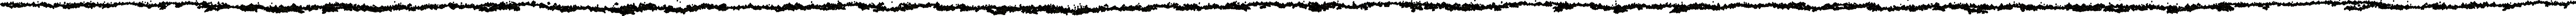

In [70]:
# attempting to extract a single tree from rfc5 and graph it as a final thing

# Extract single tree
estimator = rfc5.estimators_[5] # arbitrary number

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = featurenames3,
                class_names = "Loan Status",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
# I say it's beautiful!
# The beautiful part is getting >90% accuracy without any features relating to payment amount or outstanding principal!

# - JAF